In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
import joblib

import datetime

In [2]:
# Train
size = 'demo'
type_ = 'train'

X_train_file_path = f'./files/numpy/X_{type_}_{size}.npy'
y_train_file_path = f'./files/numpy/y_{type_}_{size}.npy'

X_train = np.load(X_train_file_path)
y_train = np.load(y_train_file_path)

# Validation 
size = 'demo'
type_ = 'validation'

X_val_file_path = f'./files/numpy/X_{type_}_{size}.npy'
y_val_file_path = f'./files/numpy/y_{type_}_{size}.npy'

X_val = np.load(X_val_file_path)
y_val = np.load(y_val_file_path)


print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(19818, 900)
(20212, 900)
(19818,)
(20212,)


In [3]:
X_train[0]

array([-6.85254382e-02,  2.40214917e-01,  1.90016425e-02,  3.53295970e-02,
        1.24993705e-01, -1.48824182e-01,  3.25227231e-02, -2.11469606e-02,
        1.30807179e-01, -1.77743714e-01, -1.30643387e-01,  1.92764469e-01,
       -1.48390720e-01,  4.14268625e-02, -1.11746948e-01, -5.43045047e-02,
       -2.74908919e-02,  3.79972809e-02, -8.93479778e-03,  7.72474169e-02,
       -1.51641848e-01,  4.34816185e-02, -1.29334501e-01, -1.19786660e-01,
       -1.42055834e-01,  1.48221838e-01,  3.90918604e-02,  3.08398449e-02,
        4.10906183e-03, -9.60288669e-02,  1.01036550e-01, -2.02938596e-01,
       -2.78403839e-01, -6.68456407e-03, -1.22836224e-01,  1.22399871e-03,
       -4.76076901e-03, -9.67659632e-03,  7.41634103e-02,  1.95300452e-02,
        5.79674119e-02,  1.11410687e-01, -1.65377043e-01,  1.06860129e-01,
       -7.82627943e-02, -1.47640939e-01,  9.28517286e-03, -7.57759332e-02,
        4.73545471e-02,  4.84107100e-02, -2.80156082e-01,  6.16574344e-02,
        4.03200267e-02, -

In [4]:
y_train[0:10]

array([11.,  6., 18., 15., 25., 16., 28., 12., 23., 10.])

In [5]:
# # Normalize the input data
# scaler_X = StandardScaler()
# X_train = scaler_X.fit_transform(X_train)
# X_val = scaler_X.transform(X_val)

# # Normalize the target data
# scaler_y = MinMaxScaler()
# y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_val = scaler_y.transform(y_val.reshape(-1, 1)).flatten()

In [6]:
# # Save the scalers
# joblib.dump(scaler_X, './files/models/scaler_X.pkl')
# joblib.dump(scaler_y, './files/models/scaler_y.pkl')

In [7]:
X_train[0]

array([-6.85254382e-02,  2.40214917e-01,  1.90016425e-02,  3.53295970e-02,
        1.24993705e-01, -1.48824182e-01,  3.25227231e-02, -2.11469606e-02,
        1.30807179e-01, -1.77743714e-01, -1.30643387e-01,  1.92764469e-01,
       -1.48390720e-01,  4.14268625e-02, -1.11746948e-01, -5.43045047e-02,
       -2.74908919e-02,  3.79972809e-02, -8.93479778e-03,  7.72474169e-02,
       -1.51641848e-01,  4.34816185e-02, -1.29334501e-01, -1.19786660e-01,
       -1.42055834e-01,  1.48221838e-01,  3.90918604e-02,  3.08398449e-02,
        4.10906183e-03, -9.60288669e-02,  1.01036550e-01, -2.02938596e-01,
       -2.78403839e-01, -6.68456407e-03, -1.22836224e-01,  1.22399871e-03,
       -4.76076901e-03, -9.67659632e-03,  7.41634103e-02,  1.95300452e-02,
        5.79674119e-02,  1.11410687e-01, -1.65377043e-01,  1.06860129e-01,
       -7.82627943e-02, -1.47640939e-01,  9.28517286e-03, -7.57759332e-02,
        4.73545471e-02,  4.84107100e-02, -2.80156082e-01,  6.16574344e-02,
        4.03200267e-02, -

In [8]:
y_train[0:10]

array([11.,  6., 18., 15., 25., 16., 28., 12., 23., 10.])

In [9]:
# model = Sequential([
#     tf.keras.Input(shape=(X_val.shape[1],)),
#     Dense(256, activation='relu'),
#     Dropout(0.2),  # Adding Dropout layer after the first Dense layer
#     Dense(128, activation='relu'),
#     Dropout(0.2),  # Adding Dropout layer after the second Dense layer
#     Dense(32, activation='relu'),
#     Dropout(0.2),  # Adding Dropout layer after the third Dense layer
#     Dense(1, activation='linear')
# ])

# # Define the optimizer with a specific learning rate
# learning_rate = 1e-4
# clipnorm=1.0
# optimizer = Adam(learning_rate=learning_rate,clipnorm =clipnorm)

# # Compile the model
# model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae', 'accuracy']) 

# # Summary of the model
# model.summary()

In [10]:
# Define the model
model = Sequential([
    tf.keras.Input(shape=(X_val.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the first Dense layer
    Dense(128, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the second Dense layer
    Dense(32, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the third Dense layer
    Dense(1, activation='linear')
])
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=2, min_lr=0.005)
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae', 'mape'])


In [11]:
# Prepare TensorBoard callback
log_dir = "files/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
num_epochs = 20
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=16,
                    validation_data=(X_val, y_val),
                    
                    callbacks=[tensorboard_callback, TqdmCallback(verbose=1),early_stop], #, reduce_lr
                    verbose=2)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/20
1239/1239 - 3s - loss: 207.7046 - mse: 207.7046 - mae: 11.1797 - mape: 79.2230 - val_loss: 215.1092 - val_mse: 215.1092 - val_mae: 11.4392 - val_mape: 82.3027
Epoch 2/20
1239/1239 - 2s - loss: 192.1795 - mse: 192.1795 - mae: 10.7947 - mape: 77.7986 - val_loss: 217.5474 - val_mse: 217.5474 - val_mae: 11.6766 - val_mape: 87.8849
Epoch 3/20
1239/1239 - 2s - loss: 186.1402 - mse: 186.1402 - mae: 10.6336 - mape: 76.7258 - val_loss: 227.2738 - val_mse: 227.2738 - val_mae: 11.9383 - val_mape: 92.0630
Epoch 4/20
1239/1239 - 2s - loss: 181.4899 - mse: 181.4899 - mae: 10.4805 - mape: 75.9707 - val_loss: 223.5933 - val_mse: 223.5933 - val_mae: 11.4432 - val_mape: 79.3444
Epoch 5/20
1239/1239 - 2s - loss: 176.5121 - mse: 176.5121 - mae: 10.2957 - mape: 74.3359 - val_loss: 242.1968 - val_mse: 242.1968 - val_mae: 12.4339 - val_mape: 100.3605
Epoch 6/20
1239/1239 - 2s - loss: 170.5851 - mse: 170.5851 - mae: 10.1637 - mape: 73.6279 - val_loss: 277.1853 - val_mse: 277.1853 - val_mae: 13.1655

In [12]:
pd.DataFrame(history.history)

,loss,mse,mae,mape,val_loss,val_mse,val_mae,val_mape
0,207.704575,207.704575,11.179689,79.222969,215.109238,215.109238,11.439215,82.302689
1,192.179504,192.179504,10.794661,77.798576,217.547394,217.547394,11.676625,87.884872
2,186.140198,186.140198,10.633561,76.725815,227.273819,227.273819,11.938305,92.062988
3,181.489899,181.489899,10.480518,75.970726,223.593292,223.593292,11.443152,79.344429
4,176.512115,176.512115,10.295658,74.335915,242.196808,242.196808,12.433887,100.360451
5,170.585083,170.585083,10.163731,73.627945,277.185303,277.185303,13.165474,109.660278
6,164.981567,164.981567,9.948340,71.512886,390.715881,390.715881,15.562695,138.925354
7,157.023849,157.023849,9.686131,69.764008,324.078033,324.078033,13.822455,115.734604
8,148.846771,148.846771,9.400537,67.700035,517.947144,517.947144,16.933443,150.736008
9,143.143768,143.143768,9.198479,66.090492,575.236633,575.236633,17.674736,157.159119


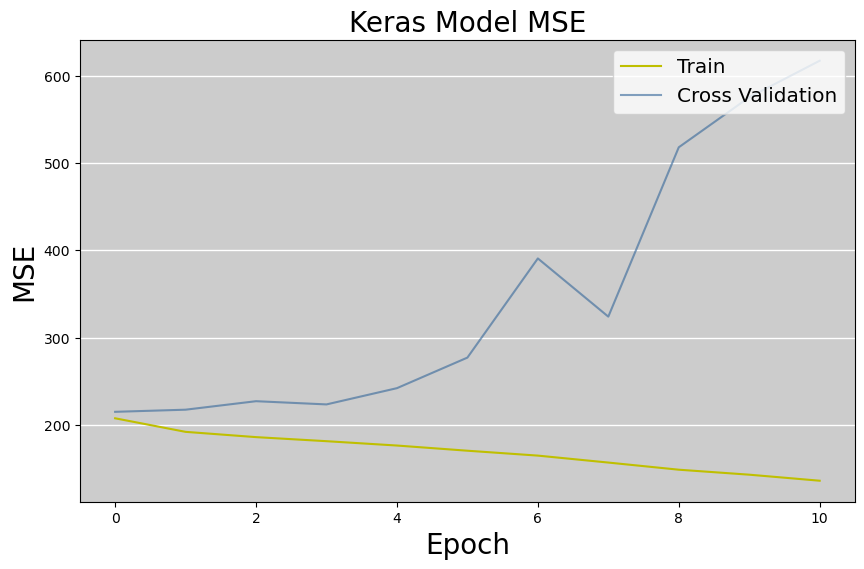

In [13]:
plt.figure(figsize=(10,6))
plt.plot(history.history['mse'], color='y')
plt.plot(history.history['val_mse'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model MSE',size=20)
plt.ylabel('MSE',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

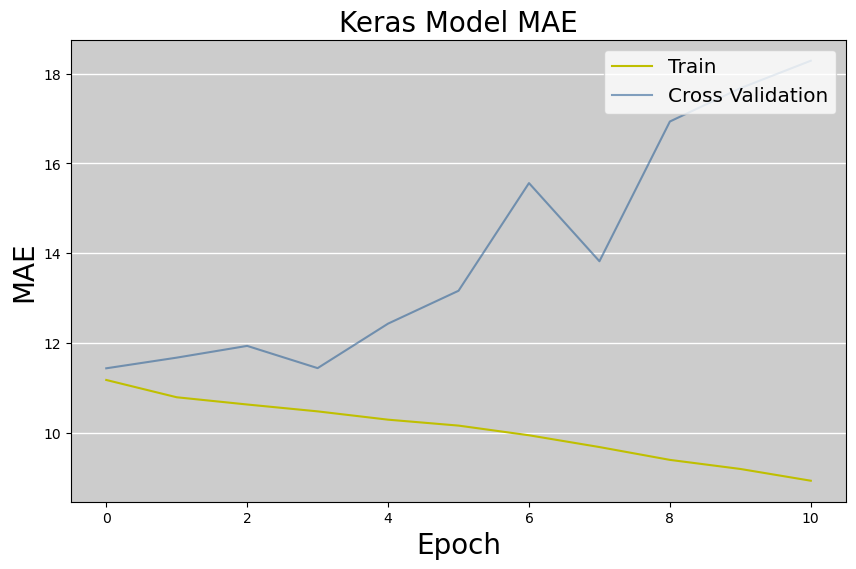

In [14]:
plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], color='y')
plt.plot(history.history['val_mae'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model MAE',size=20)
plt.ylabel('MAE',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

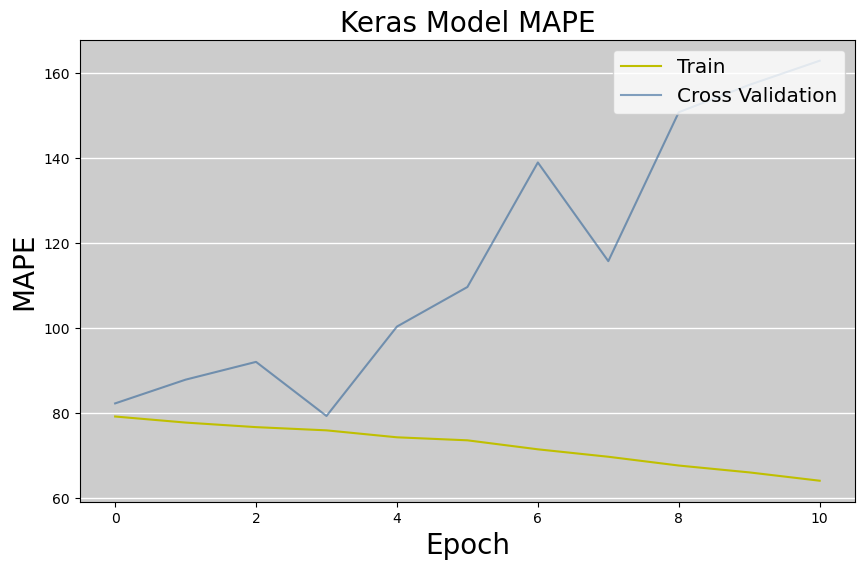

In [15]:
plt.figure(figsize=(10,6))
plt.plot(history.history['mape'], color='y')
plt.plot(history.history['val_mape'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model MAPE',size=20)
plt.ylabel('MAPE',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

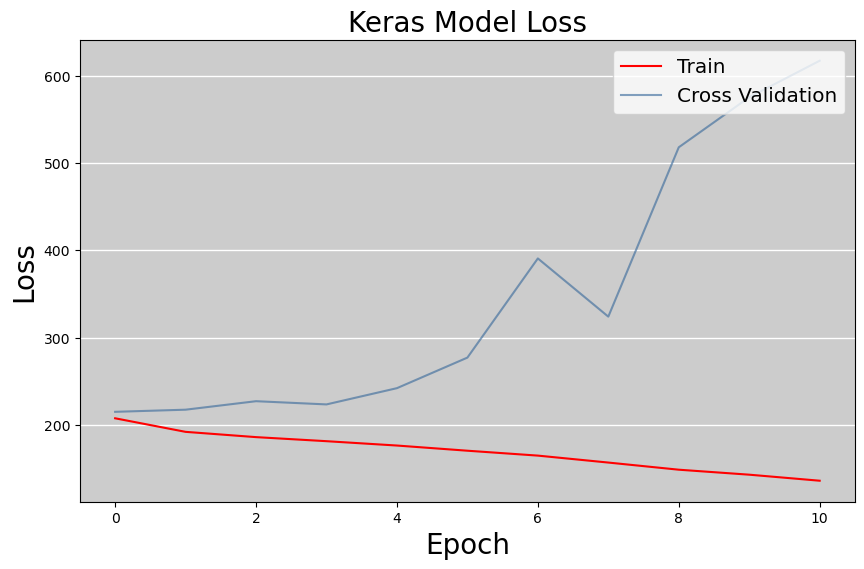

In [16]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model Loss',size=20)
plt.ylabel('Loss',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

In [17]:
# Evaluate the model
train_loss, train_mse,train_mae,train_acc = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_mse,test_mae,test_acc = model.evaluate(X_val, y_val, verbose=1)

632/632 [==============================] - 0s 625us/step - loss: 215.1093 - mse: 215.1093 - mae: 11.4392 - mape: 82.3027


In [18]:
# Save the 
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_file_path = f'./files/models/model_{now}.h5py'
model.save(model_file_path)

INFO:tensorflow:Assets written to: ./files/models/model_20240715-205155.h5py\assets
